# Phising Detection

### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

### EDA

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.size

27860

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Data Cleaning

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

In [12]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

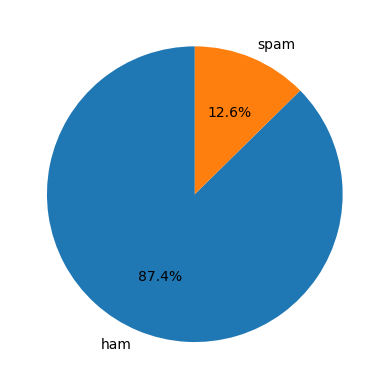

In [17]:
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.show()

### Data Spliting

In [18]:
x = df['message']
y = df['label']

In [19]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [20]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [23]:
cv = CountVectorizer()

In [24]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [25]:
print(x_train_cv)

  (0, 1981)	1
  (0, 6682)	1
  (0, 4330)	1
  (0, 7368)	1
  (0, 7592)	1
  (0, 5490)	1
  (0, 5498)	1
  (1, 1349)	1
  (1, 5993)	1
  (1, 1379)	1
  (1, 3758)	1
  (1, 6749)	1
  (1, 7635)	1
  (2, 3751)	1
  (2, 5825)	1
  (2, 3325)	1
  (2, 4102)	1
  (2, 5410)	1
  (2, 3590)	1
  (2, 4185)	1
  (2, 3222)	1
  (3, 7638)	1
  (3, 2457)	1
  (3, 4641)	1
  (3, 6827)	1
  :	:
  (4132, 6186)	1
  (4132, 6545)	1
  (4132, 992)	1
  (4132, 3459)	1
  (4132, 2569)	1
  (4132, 1572)	1
  (4132, 1368)	1
  (4132, 3672)	1
  (4132, 7320)	1
  (4133, 3590)	1
  (4133, 6827)	1
  (4133, 3316)	1
  (4133, 2365)	1
  (4133, 1548)	1
  (4133, 911)	1
  (4133, 4858)	1
  (4133, 5030)	1
  (4133, 1665)	1
  (4133, 904)	1
  (4134, 1089)	1
  (4134, 6796)	1
  (4134, 6020)	1
  (4134, 1887)	1
  (4134, 7363)	1
  (4134, 6849)	1


### Model Training

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
lr.fit(x_train_cv, y_train)
prediction_train = lr.predict(x_train_cv)

### Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train) * 100)

99.80652962515116


In [29]:
lr.fit(x_test_cv, y_test)
prediction_test = lr.predict(x_test_cv)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test) * 100)

99.61315280464217


### Exporting Model

In [31]:
import joblib
joblib.dump(lr, 'spam_classifier.joblib')
joblib.dump(cv, 'cv.joblib')

['cv.joblib']